## Parte 2 de Prueba de evaluación

Realizado por Araceli Macía Barrado



En esta segunda parte trabajaremos con un dataset de R que describe las características físicas de un conjunto de diamantes. Puede cargarse mediante get_rdataset(), y está en el paquete "ggplot2" con nombre "diamonds".


http://hamelg.blogspot.com.es/2015/11/python-for-data-analysis-part-19.html

http://hamelg.blogspot.com.es/2015/11/python-for-data-analysis-part-21.html > Medidas general.

http://pybonacci.org/2012/05/25/manual-de-introduccion-a-matplotlib-pyplot-iii-configuracion-del-grafico/

In [1]:
#from ggplot import diamonds
import statsmodels.api as sm
import pandas as pd
import numpy as np

diamonds = sm.datasets.get_rdataset("diamonds","ggplot2")
print diamonds.__doc__
MyDiamonds = diamonds.data
MyDiamonds.head()

+------------+-------------------+
| diamonds   | R Documentation   |
+------------+-------------------+

Prices of 50,000 round cut diamonds
-----------------------------------

Description
~~~~~~~~~~~

A dataset containing the prices and other attributes of almost 54,000
diamonds. The variables are as follows:

Usage
~~~~~

::

    data(diamonds)

Format
~~~~~~

A data frame with 53940 rows and 10 variables

Details
~~~~~~~

-  price. price in US dollars (\\$326–\\$18,823)

-  carat. weight of the diamond (0.2–5.01)

-  cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal)

-  colour. diamond colour, from J (worst) to D (best)

-  clarity. a measurement of how clear the diamond is (I1 (worst), SI1,
   SI2, VS1, VS2, VVS1, VVS2, IF (best))

-  x. length in mm (0–10.74)

-  y. width in mm (0–58.9)

-  z. depth in mm (0–31.8)

-  depth. total depth percentage = z / mean(x, y) = 2 \* z / (x + y)
   (43–79)

-  table. width of top of diamond relative to widest point (43–95)





,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


• **Calcula los valores máximo, mínimo y medio de la variable carat.**

In [2]:
print "*******"
print MyDiamonds.carat.describe()

VarCarat = MyDiamonds["carat"]

maxCarat = VarCarat.values.max()
minCarat = VarCarat.values.min()
meanCarat = VarCarat.values.mean()
desTipica=VarCarat.values.std()
print "*******"

print "max es :", maxCarat
print "min es :",minCarat
print "mean es :",meanCarat
print "desviacion tipica es :",desTipica



*******
count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64
*******
max es : 5.01
min es : 0.2
mean es : 0.797939747868
desviacion tipica es : 0.47400685051


* **Dibuja su histograma y sobre el mismo gráfico, el histograma de una muestra aleatoria
del mismo tamaño con puntos obtenidos de una distribución gamma con la misma media y desviación típica. Haz que la visualización sea más adecuada haciendo transparente uno de los histogramas utilizando el parámetro alpha.**

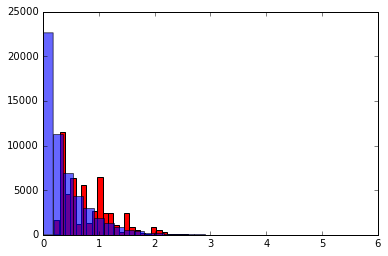

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

r = np.random.gamma(meanCarat, desTipica, MyDiamonds.carat.size)
#plt.title="histogramas"
plt.hist(MyDiamonds.carat, bins=50, color="red", label="carat")
plt.hist(r, bins=25,alpha=0.6,color="blue", label="gamma")

plt.show()


* **Utilizando matplotlib, dibuja la nube de puntos de carat contra el precio, con ambos ejes en escala logarítmica.**

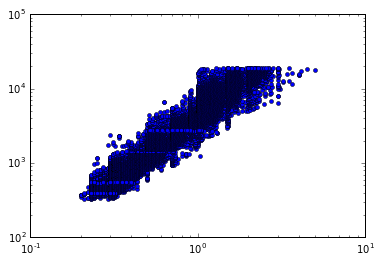

In [4]:

plt.semilogx()
plt.semilogy()
plt.xlabel="aa"
plt.plot(MyDiamonds.carat, MyDiamonds.price, 'o', label='Nube puntos', markersize=4)
plt.show()

* **Ahora repite el gráfico pero utiliza solo los datos cuyo color sea "E" y su claridad sea "SI1"**


   carat    cut color clarity  depth  table  price     x     y     z
0   0.23  Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
   carat      cut color clarity  depth  table  price     x     y     z
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31


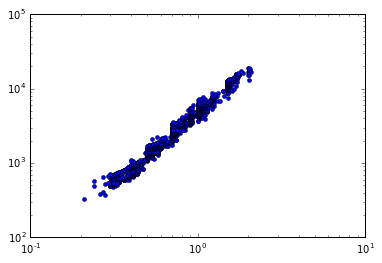

In [5]:
print MyDiamonds.head(1)
Filtro = MyDiamonds[MyDiamonds.color=="E"]
Filtro =  Filtro[Filtro.clarity=="SI1"]
print Filtro.head(1)
plt.semilogx()
plt.semilogy()
plt.xlabel="aa"
plt.plot(Filtro.carat, Filtro.price, 'o', label='Nube puntos', markersize=4)
plt.show()


* **Investiga con un gráfico la relación entre el volumen (que puedes aproximar a partir de x, y, z) y el precio, de nuevo en escala logarítmica.**

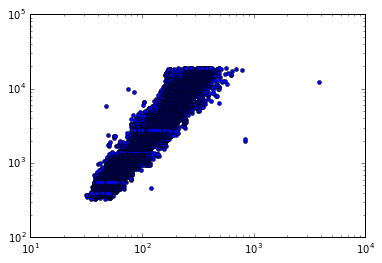

In [6]:
volDiamond=MyDiamonds.x * MyDiamonds.y * MyDiamonds.z
MyDiamonds["volum"]=volDiamond
plt.semilogx()
plt.semilogy()
#Voy a realizar un diagrama de puntos para ver su relacion.

plt.plot(MyDiamonds.volum, MyDiamonds.price, 'o', label='Nube puntos', markersize=4)


* **Utilizando scipy.stats, comprueba si se la relación anterior ajusta bien a un modelo de regresión lineal, tomando solo los 1000 primeros valores del dataset.**

In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

filtro=MyDiamonds.head(1000)
y = filtro['price']
X = filtro['volum']
mod2 = sm.OLS(y,X)
res = mod2.fit()
print (res.summary())
print res.params
print res.rsquared


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.720e+04
Date:                Wed, 13 Jul 2016   Prob (F-statistic):               0.00
Time:                        18:24:55   Log-Likelihood:                -7466.0
No. Observations:                1000   AIC:                         1.493e+04
Df Residuals:                     999   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
volum         22.1492      0.115    192.871      0.0

<font color=green>Ajusta perfectamente a un modelo de regresion lineal, ya que como vemos, R-squared tiene un valor muy cercano a 1. </font>

* **Utilizando seaborn, representa la nube de puntos del precio contra el carat y asociando al diagrama las distribuciones de las dos variables.**

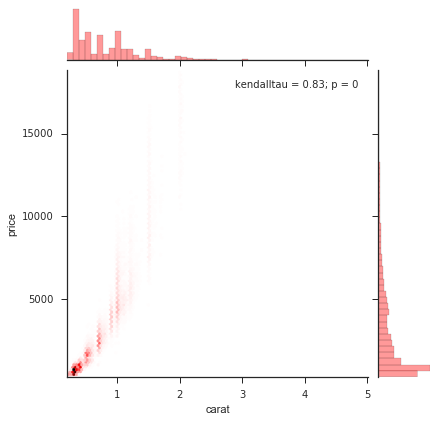

In [8]:

import statsmodels.api as sm
import seaborn as sns  #se importa como sns. 
from scipy.stats import kendalltau
sns.set(style="ticks")

sns.jointplot(MyDiamonds.carat, MyDiamonds.price, kind="hex", stat_func=kendalltau, color="red")


• **Identifica con un comando los diferentes tipos de corte (cut).**

In [9]:
print (MyDiamonds["cut"].unique())


['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']


* **Comprueba si hay diferencias significativas en la media del precio para los de corte
"Ideal" y "Premium" y el resto, tomando 1000 valores de cada (nótese que no se puede asumir que las muestras son de una distribución normal). Puedes investigar funciones lógicas vectorizadas en NumPy como logical_or().**

In [10]:
Ideales=MyDiamonds[np.logical_or(MyDiamonds["cut"]=="Ideal",MyDiamonds["cut"]=="Premium" )].head(1000)
print "compruebo cut: ", Ideales.cut.unique()
print "La media de los ideales " , Ideales.price.mean()

Resto=MyDiamonds[np.logical_and(MyDiamonds["cut"]!="Ideal",MyDiamonds["cut"]!="Premium" )].head(1000)
print "compruebo cut: ", Resto.cut.unique()
print "La media del resto " , Resto.price.mean()


compruebo cut:  ['Ideal' 'Premium']
La media de los ideales  2573.572
compruebo cut:  ['Good' 'Very Good' 'Fair']
La media del resto  2692.669


* **Obten la mediana del precio por cada valor de la claridad (clarity) y ordena los resultados de manera descendente.**

In [11]:
print (MyDiamonds["clarity"].unique())


['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [12]:
byClarity = MyDiamonds.groupby("clarity") #Agrupo por los valores de Clarity.
print byClarity.count() 
print "******************" 
mediaCalculada= pd.DataFrame(byClarity.price.median() )          # obtengo la mediana por precio.
print mediaCalculada
print mediaCalculada.sort_values(['price'], ascending=[0]) #ordeno los valores de forma descendente.

         carat    cut  color  depth  table  price      x      y      z  volum
clarity                                                                      
I1         741    741    741    741    741    741    741    741    741    741
IF        1790   1790   1790   1790   1790   1790   1790   1790   1790   1790
SI1      13065  13065  13065  13065  13065  13065  13065  13065  13065  13065
SI2       9194   9194   9194   9194   9194   9194   9194   9194   9194   9194
VS1       8171   8171   8171   8171   8171   8171   8171   8171   8171   8171
VS2      12258  12258  12258  12258  12258  12258  12258  12258  12258  12258
VVS1      3655   3655   3655   3655   3655   3655   3655   3655   3655   3655
VVS2      5066   5066   5066   5066   5066   5066   5066   5066   5066   5066
******************
         price
clarity       
I1        3344
IF        1080
SI1       2822
SI2       4072
VS1       2005
VS2       2054
VVS1      1093
VVS2      1311
         price
clarity       
SI2       4072
I1    